In [32]:
import os
import numpy as np
import random
import cv2
import sklearn
import matplotlib.pyplot as plt
from PIL import Image
from keras.preprocessing import image
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers.normalization import BatchNormalization
from keras.layers import Dense , Flatten , MaxPooling2D , Dropout , Activation , AveragePooling2D , Conv2D
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from keras.models import load_model

In [2]:
training_data     = []
def Preprocessing(path , img):
    img_array = cv2.imread(os.path.join(path , img))
    image_from_array = Image.fromarray(img_array , 'RGB')
    sized_image = image_from_array.resize((img_size , img_size))
    training_data.append(np.array(sized_image))

In [3]:
men_path          = 'F:\Projects\Men And Women Classification\Dataset\data\men'
women_path        = 'F:\Projects\Men And Women Classification\Dataset\data\women'
img_size          = 300
counter           = 0
labels            = []

for img in os.listdir(men_path):
    try:
        Preprocessing(men_path , img)
        labels.append(1)
    except Exception as e:
        pass

for img in os.listdir(women_path):
    try:
        Preprocessing(women_path , img)
        labels.append(0)
    except Exception as e:
        pass

In [4]:
np.shape(training_data)

(3311, 300, 300, 3)

In [5]:
X = np.array(training_data)
y = np.array(labels)
print(X.shape)
print(y.shape)

(3311, 300, 300, 3)
(3311,)


In [6]:
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.25 , random_state = 42 , shuffle = True)

In [7]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(2483, 300, 300, 3)
(828, 300, 300, 3)
(2483,)
(828,)


In [8]:
model = Sequential()
model.add(Conv2D(filters = 16 , kernel_size = 2 ,padding = "same" , activation = "relu" , 
                 input_shape = (img_size , img_size , 3)))
model.add(MaxPooling2D(pool_size = 2))
model.add(BatchNormalization())
model.add(Dropout(0.25))


model.add(Conv2D(filters = 32 , kernel_size = 2 , padding = "same" , activation = "relu"))
model.add(MaxPooling2D(pool_size = 2))
model.add(BatchNormalization())
model.add(Dropout(0.25))


model.add(Conv2D(filters = 64 , kernel_size = 2 , padding = "same" , activation = "relu"))
model.add(MaxPooling2D(pool_size = 2))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Flatten())
model.add(BatchNormalization())
model.add(Dense(500 , activation = "relu"))
model.add(Dropout(0.25))

model.add(Dense(1 , activation = "sigmoid"))

model.summary()

#softmax => stucks at accuraccy and loss.
#sigmoid => works just fine.

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 300, 300, 16)      208       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 150, 150, 16)      0         
_________________________________________________________________
batch_normalization (BatchNo (None, 150, 150, 16)      64        
_________________________________________________________________
dropout (Dropout)            (None, 150, 150, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 150, 150, 32)      2080      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 75, 75, 32)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 75, 75, 32)        1

In [9]:
model.compile(loss = 'binary_crossentropy' , optimizer = 'adam' , metrics = ['accuracy'])

In [10]:
model.fit(X_train , y_train , batch_size = 128 , epochs = 15 , validation_split = 0.2)

Epoch 1/15
16/16 [==============================] - 227s 14s/step - loss: 10.8546 - accuracy: 0.5534 - val_loss: 8.1119 - val_accuracy: 0.5976
Epoch 2/15
16/16 [==============================] - 207s 13s/step - loss: 3.6533 - accuracy: 0.7296 - val_loss: 7.8711 - val_accuracy: 0.6258
Epoch 3/15
16/16 [==============================] - 204s 13s/step - loss: 2.5161 - accuracy: 0.8006 - val_loss: 3.0138 - val_accuracy: 0.5372
Epoch 4/15
16/16 [==============================] - 201s 13s/step - loss: 1.6721 - accuracy: 0.8479 - val_loss: 2.4415 - val_accuracy: 0.6157
Epoch 5/15
16/16 [==============================] - 206s 13s/step - loss: 1.0837 - accuracy: 0.8741 - val_loss: 2.9840 - val_accuracy: 0.5895
Epoch 6/15
16/16 [==============================] - 199s 12s/step - loss: 0.8033 - accuracy: 0.8963 - val_loss: 2.2332 - val_accuracy: 0.6177
Epoch 7/15
16/16 [==============================] - 201s 13s/step - loss: 0.4429 - accuracy: 0.9235 - val_loss: 1.7500 - val_accuracy: 0.6097
Epoch

In [12]:
predictions = model.predict_classes(X_test)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


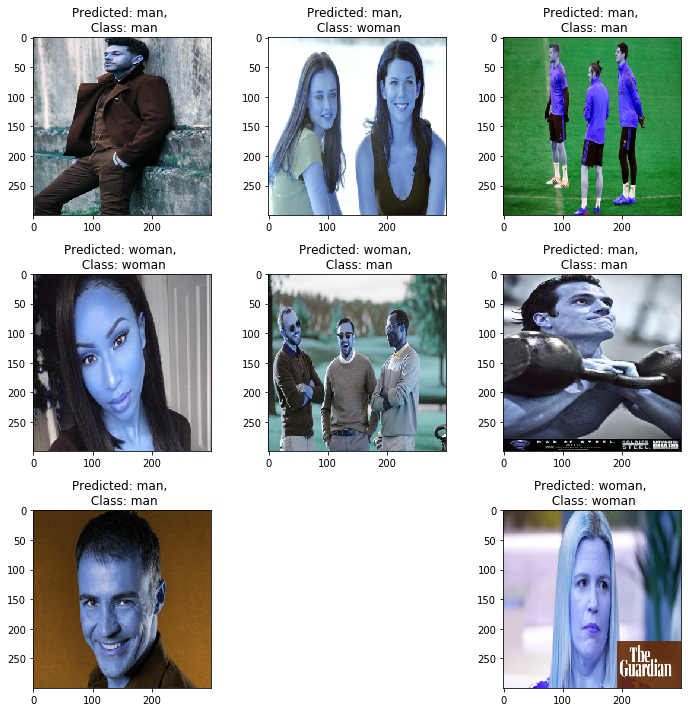

In [33]:
random_indices = [random.randint(0 , 280) for i in range(9)]
plt.figure(figsize=(10,10))
for i, index in enumerate(random_indices):
    pred = predictions[index]
    pred = 'man' if pred==1 else 'woman'
    actual = 'man' if y_test[index]==1 else 'woman'
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[index], cmap='gray', interpolation='none')
    plt.title(f"Predicted: {pred}, \n Class: {actual}")
    plt.tight_layout()

In [29]:
confusion_matrix(y_test , predictions)

array([[377,  68],
       [235, 148]], dtype=int64)

In [27]:
print(classification_report(y_test , predictions))

              precision    recall  f1-score   support

           0       0.62      0.85      0.71       445
           1       0.69      0.39      0.49       383

    accuracy                           0.63       828
   macro avg       0.65      0.62      0.60       828
weighted avg       0.65      0.63      0.61       828



In [31]:
accuracy = model.evaluate(X_test, y_test, verbose=1)
print(accuracy)

26/26 [==============================] - 16s 634ms/step - loss: 3.0636 - accuracy: 0.6341
[3.0635547637939453, 0.6340579986572266]


In [34]:
model.save('men_women_classification.h5')